# random forestを使ったクラス分類コード

In [2]:
import pandas as pd
df = pd.read_csv("test_class.txt", sep="\t")

In [3]:
x=df.loc[:, ['Nucleus: Area µm^2',
       'Nucleus: Length µm', 'Nucleus: Circularity', 'Nucleus: Solidity',
       'Nucleus: Max diameter µm', 'Nucleus: Min diameter µm',
       'Cell: Area µm^2', 'Cell: Length µm', 'Cell: Circularity',
       'Cell: Solidity', 'Cell: Max diameter µm', 'Cell: Min diameter µm',
       'Nucleus/Cell area ratio', 'Hematoxylin: Nucleus: Mean',
       'Hematoxylin: Nucleus: Median', 'Hematoxylin: Nucleus: Min',
       'Hematoxylin: Nucleus: Max', 'Hematoxylin: Nucleus: Std.Dev.',
       'Hematoxylin: Cytoplasm: Mean', 'Hematoxylin: Cytoplasm: Median',
       'Hematoxylin: Cytoplasm: Min', 'Hematoxylin: Cytoplasm: Max',
       'Hematoxylin: Cytoplasm: Std.Dev.', 'Hematoxylin: Membrane: Mean',
       'Hematoxylin: Membrane: Median', 'Hematoxylin: Membrane: Min',
       'Hematoxylin: Membrane: Max', 'Hematoxylin: Membrane: Std.Dev.',
       'Hematoxylin: Cell: Mean', 'Hematoxylin: Cell: Median',
       'Hematoxylin: Cell: Min', 'Hematoxylin: Cell: Max',
       'Hematoxylin: Cell: Std.Dev.', 'Eosin: Nucleus: Mean',
       'Eosin: Nucleus: Median', 'Eosin: Nucleus: Min', 'Eosin: Nucleus: Max',
       'Eosin: Nucleus: Std.Dev.', 'Eosin: Cytoplasm: Mean',
       'Eosin: Cytoplasm: Median', 'Eosin: Cytoplasm: Min',
       'Eosin: Cytoplasm: Max', 'Eosin: Cytoplasm: Std.Dev.',
       'Eosin: Membrane: Mean', 'Eosin: Membrane: Median',
       'Eosin: Membrane: Min', 'Eosin: Membrane: Max',
       'Eosin: Membrane: Std.Dev.', 'Eosin: Cell: Mean', 'Eosin: Cell: Median',
       'Eosin: Cell: Min', 'Eosin: Cell: Max', 'Eosin: Cell: Std.Dev.']]
y=df.loc[:, "Parent"]


In [4]:
y.value_counts()

Tumor           4600
Immune cells    4003
Other           1447
Name: Parent, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [6]:
from sklearn.ensemble import RandomForestClassifier
RFCAll=RandomForestClassifier(n_estimators=50, random_state=0, n_jobs=4)

In [7]:
model = RFCAll.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8897731794667728


In [9]:
importances = RFCAll.feature_importances_

In [10]:
importances

array([0.07152494, 0.10442896, 0.00586665, 0.00330245, 0.06557657,
       0.03707807, 0.04110116, 0.03358477, 0.00460257, 0.00288661,
       0.02598562, 0.02129137, 0.00589166, 0.00828444, 0.02412352,
       0.01351792, 0.00826897, 0.0117049 , 0.00624213, 0.00554109,
       0.00856943, 0.0083289 , 0.01793188, 0.00814378, 0.00791657,
       0.01697594, 0.00746963, 0.00967677, 0.00640112, 0.00786231,
       0.01478341, 0.00962033, 0.01957998, 0.01083474, 0.01249307,
       0.01392198, 0.00732531, 0.01082508, 0.01206687, 0.01233744,
       0.04449955, 0.00787597, 0.02576392, 0.01722736, 0.02134521,
       0.04807705, 0.00895211, 0.02088468, 0.00819751, 0.00829658,
       0.03704236, 0.00728466, 0.02068415])

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

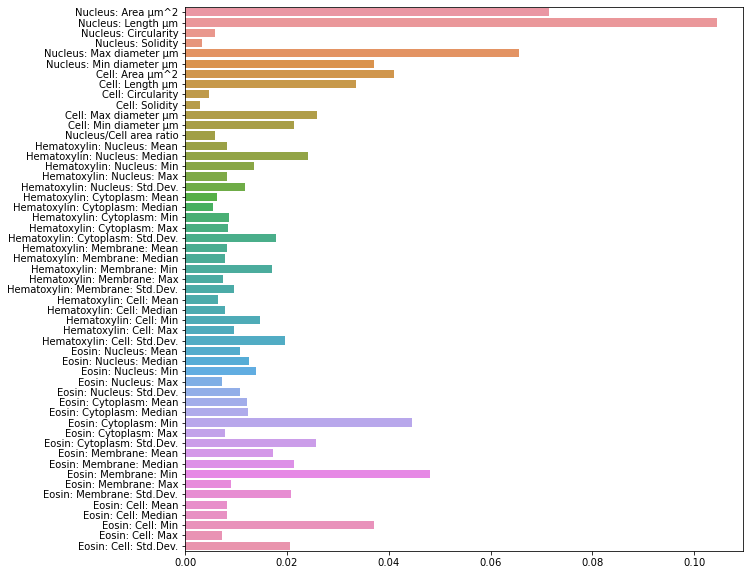

In [20]:
plt.figure(figsize=(10, 10))
sns.barplot(x=importances, y=x.columns)